# Se voglio ricostruire una coppia di elettroni di carica opposta come faccio?


il File c'è già! Non sarà riscaricato.
0
0
-rwxrwxrwx 1 jo jo 1.5M Sep  5 12:02 TTDilep.root
-rwxrwxrwx 1 jo jo 1.7M Sep  5 12:03 DYJets.root
-rwxrwxrwx 1 jo jo  49M Sep  5 12:03 Data.root
Welcome to JupyROOT 6.26/04
None
None
Collection name='THashList', class='THashList', size=1
 TKey Name = events, Title = events, Cycle = 1
******************************************************************************
*Tree    :events    : events                                                 *
*Entries :    10000 : Total =         5662329 bytes  File  Size =    1718518 *
*        :          : Tree compression factor =   3.29                       *
******************************************************************************
*Br    0 :muontracks_size : muontracks_size/I                                *
*Entries :    10000 : Total  Size=      40693 bytes  File Size  =       6335 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   6.34     *
*......................................

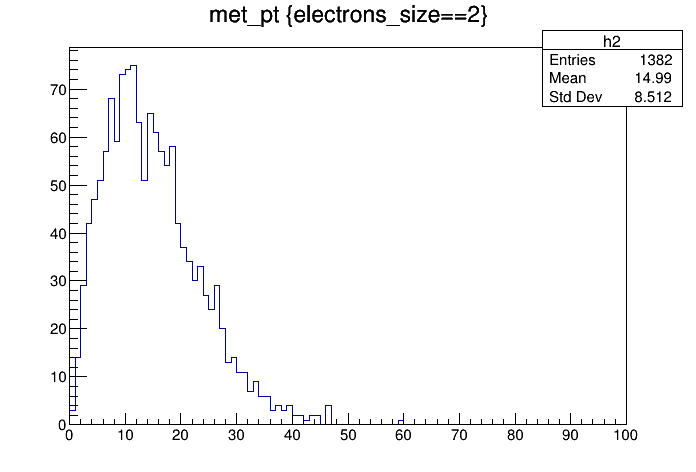

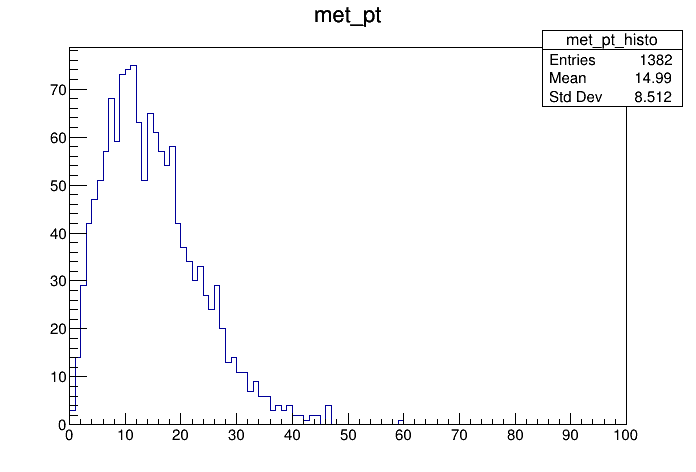

***********************************************
*    Row   * Instance * electrons * electrons *
***********************************************
*        0 *        0 *         0 *           *
*        1 *        0 *         0 *           *
*        2 *        0 *         0 *           *
*        3 *        0 *         2 *         1 *
*        3 *        1 *         2 *        -1 *
*        4 *        0 *         2 *        -1 *
*        4 *        1 *         2 *         1 *
*        5 *        0 *         1 *        -1 *
*        6 *        0 *         0 *           *
*        7 *        0 *         1 *        -1 *
*        8 *        0 *         0 *           *
*        9 *        0 *         0 *           *
*       10 *        0 *         0 *           *
*       11 *        0 *         0 *           *
*       12 *        0 *         0 *           *
*       13 *        0 *         0 *           *
*       14 *        0 *         2 *         1 *
*       14 *        1 *         2 *     

Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Warning in <TFile::Append>: Replacing existing TH1: met_pt_histo (Potential memory leak).


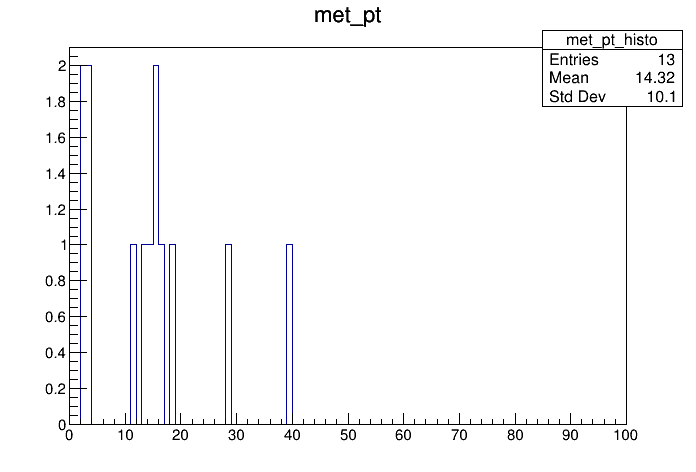

Warning in <TFile::Append>: Replacing existing TH1: met_pt_histo (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: met_pt_histo (Potential memory leak).


In [2]:
#Prima cosa: giriamo il notebook precedente 
%run ../Esercitazione3/trees_and_ntuples.ipynb

In [3]:
#Non solo l'output, anche il tree è presente!
mytree
mytree.GetEntries()

10000

## Ora facciamo un loop sugli eventi!

In [4]:

mytree.Print("jets*")

******************************************************************************
*Tree    :events    : events                                                 *
*Entries :    10000 : Total =         5662473 bytes  File  Size =    1718518 *
*        :          : Tree compression factor =   3.29                       *
******************************************************************************
*Br    0 :jets_size : jets_size/I                                            *
*Entries :    10000 : Total  Size=      40661 bytes  File Size  =       7285 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   5.51     *
*............................................................................*
*Br    1 :jets_pt   : vector<float>                                          *
*Entries :    10000 : Total  Size=     215797 bytes  File Size  =     112788 *
*Baskets :        8 : Basket Size=      32000 bytes  Compression=   1.91     *
*...................................................

In [5]:
h_jet_mass = ROOT.TH1F("Jets_mass_0","Leading jet mass",100,0,40) 
for i in range (mytree.GetEntries()):
    mytree.GetEntry(i)
    #Ogni 100 eventi stampo a schermo il vettore dei jet!
    if(i%1000==0):print( "event #", i, "n jets ",mytree.jets_size, " pt: ",mytree.jets_pt)
    #Se c'è almeno 1 jet: stampo il 

    if(mytree.jets_size):
            jet_0 =ROOT.TLorentzVector()
            jet_0.SetPtEtaPhiE(mytree.jets_pt[0],mytree.jets_eta[0],mytree.jets_phi[0],mytree.jets_e[0])
            if(i%1000==0):print("leading jet pt",mytree.jets_pt[0]," mass? ",jet_0.M())
            h_jet_mass.Fill(jet_0.M())

event # 0 n jets  2  pt:  { 23.5252f, 21.2744f }
leading jet pt 23.525209426879883  mass?  5.780231232227896
event # 1000 n jets  2  pt:  { 132.482f, 123.424f }
leading jet pt 132.4822998046875  mass?  12.171880845745264
event # 2000 n jets  2  pt:  { 52.9363f, 44.1318f }
leading jet pt 52.93634796142578  mass?  6.571729939939291
event # 3000 n jets  1  pt:  { 32.7383f }
leading jet pt 32.738304138183594  mass?  6.479578478494318
event # 4000 n jets  4  pt:  { 77.3369f, 43.2297f, 36.9718f, 26.8002f }
leading jet pt 77.3369369506836  mass?  17.612279455459902
event # 5000 n jets  1  pt:  { 30.9888f }
leading jet pt 30.98876953125  mass?  3.0345546335572213
event # 6000 n jets  3  pt:  { 102.553f, 97.4465f, 25.9533f }
leading jet pt 102.55277252197266  mass?  12.561784171985517
event # 7000 n jets  1  pt:  { 89.6939f }
leading jet pt 89.69392395019531  mass?  12.463836696754655
event # 8000 n jets  2  pt:  { 24.9785f, 22.9679f }
leading jet pt 24.978546142578125  mass?  7.492171015892832

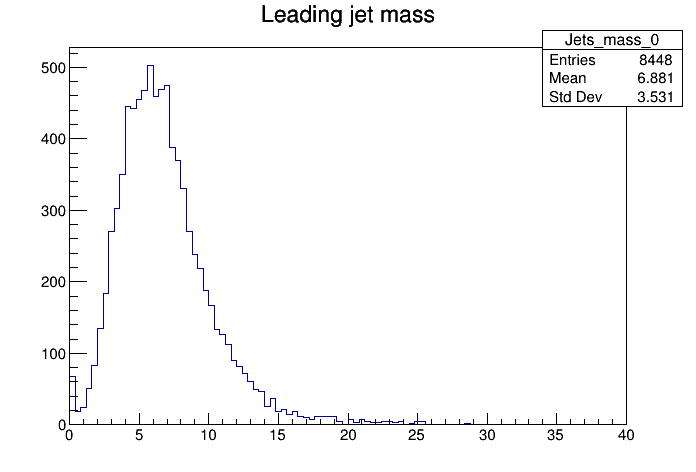

In [6]:
#Diseg
c1= ROOT.TCanvas()
c1.Draw()
h_jet_mass.Draw()

## Esercizio 1:

Proviamo a fare la somma vettoriale  di due elettroni di carica opposta e disegnarne la massa.
Facciamo lo stesso coi muoni.

### 1.1 Che forma ha questa distribuzione

### 1.2 Quante coppie avrò per evento?


## Esercizio 2: 

Proviamo a fittare la distribuzione che viene fuori, ad es. con gauss + expo, o... altro?


Warning in <TFile::Append>: Replacing existing TH1: h_mass_el (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_mass_mu (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: masses


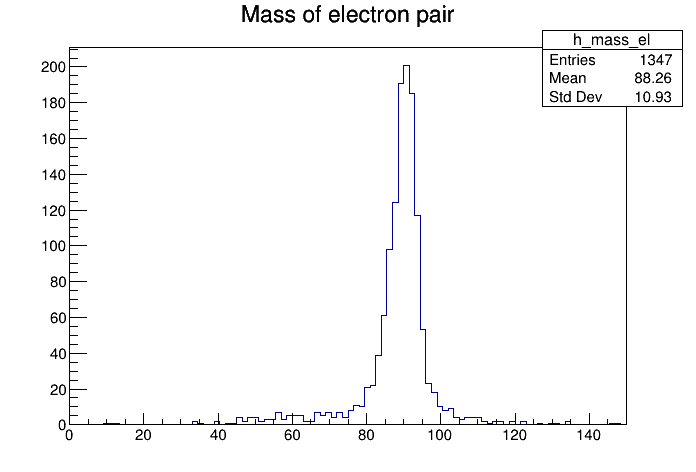

In [8]:
m_min=0
m_max=150
h_mass_el=ROOT.TH1F("h_mass_el","Mass of electron pair",100,m_min,m_max)
h_mass_mu=ROOT.TH1F("h_mass_mu","Mass of muon pair",100,m_min,m_max)



for i in range(mytree.GetEntries()):
#for i in range(100):
    mytree.GetEntry(i)
    for ei in range(mytree.electrons_size):
        for ej in range(ei):
            if mytree.electrons_charge[ei]* mytree.electrons_charge[ej]<0:
                e1=  ROOT.TLorentzVector()
                e2=ROOT.TLorentzVector()
                e1.SetPtEtaPhiE(mytree.electrons_pt[ei],mytree.electrons_eta[ei],mytree.electrons_phi[ei],mytree.electrons_e[ei])
                e2.SetPtEtaPhiE(mytree.electrons_pt[ej],mytree.electrons_eta[ej],mytree.electrons_phi[ej],mytree.electrons_e[ej])
                h_mass_el.Fill((e1+e2).M())


c1=ROOT.TCanvas("masses")
c1.Draw()
h_mass_el.Draw()

In [9]:
#Let's take a step further - a bit less monke

#1 Classe "particella"
class particle:
    def __init__(self, pt,eta,phi,e,charge,flavor):
        self.pt=pt
        self.eta=eta
        self.phi=phi
        self.e=e
        self.charge=charge
        self.flavor=flavor
        self.p4 = ROOT.TLorentzVector()
        self.p4.SetPtEtaPhiE(pt,eta,phi,e)
        
#2 Metodo per estrarla:    
def get_particle(tree=mytree,var="muontracks",index=0):
    flav_dict={"muontracks":13,"electrons":11}
    p = particle(getattr(tree,var+"_pt")[index],#getattr chiama dall'esterno un attributo con il nome preso come stringa
                getattr(tree,var+"_eta")[index],
                getattr(tree,var+"_phi")[index],
                getattr(tree,var+"_e")[index],
                getattr(tree,var+"_charge")[index] if hasattr(tree,var+"_charge") else 0,#nota: questo per i jet fallirà se non faccio qualcosa!
                -1*getattr(tree,var+"_charge")[index]*(flav_dict[var]) if hasattr(tree,var+"_charge") else 0)
    return p

def get_collection(tree=mytree,var="muontracks"):
    particles=[get_particle(tree,var,i) for i in range(getattr(tree,var+"_size"))]
    return particles

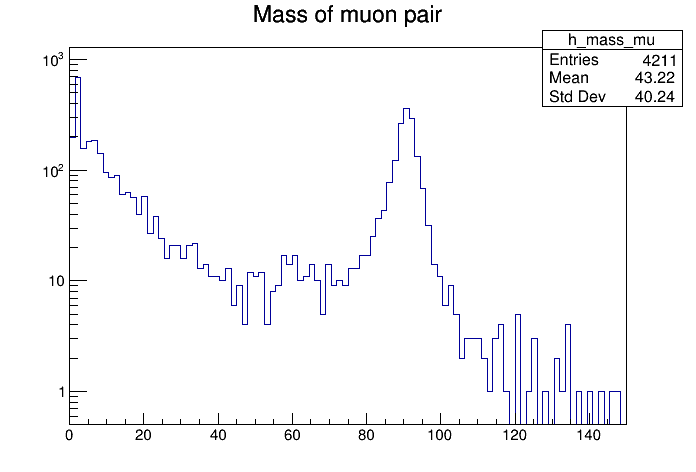

In [12]:
are_os = lambda x,y: x.charge*y.charge<0 #Uso lambda per vedere se sono segno opposto (opposite sign)
are_ss = lambda x,y: x.charge*y.charge>0 # o same sign (ss) -> quest'ultimo è ridondante in realtà!

h_mass_mu.Reset("ICES")

h_mass_mu_ss=h_mass_mu.Clone("h_mass_mu_os")


for i in range(mytree.GetEntries()):
#for i in range(100):
    mytree.GetEntry(i)
    muons=get_collection(mytree,"muontracks")
    electrons=get_collection(mytree,"electrons")
    jets=get_collection(mytree,"jets")
   
    for mi in range(len(muons)):
        for mj in range(mi):
            if(are_os(muons[mi],muons[mj])):
                h_mass_mu.Fill((muons[mi].p4+muons[mj].p4).M())
            else:
                h_mass_mu_ss.Fill((muons[mi].p4+muons[mj].p4).M())
            
c1.Draw()
h_mass_mu.Draw()

 FCN=56.4327 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=1.09224e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.42402e+03   1.26258e+02   3.40538e-01  -1.17196e-06
   2  p1           1.25200e+01   5.50627e-01   1.48541e-03  -3.67440e-04


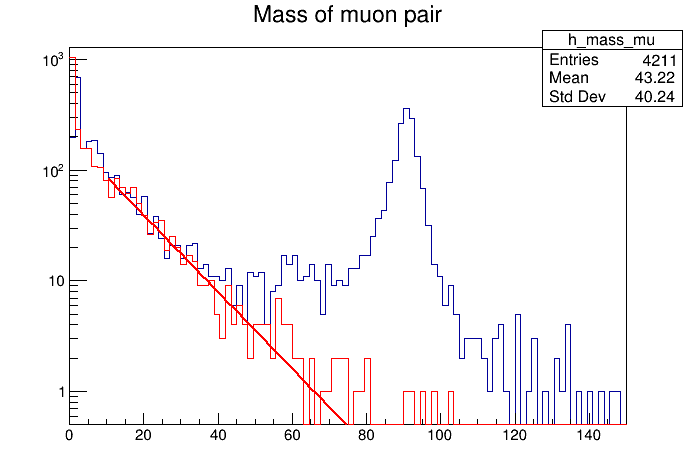

In [13]:
c1.Draw()
h_mass_mu_ss.SetLineColor(ROOT.kRed)
h_mass_mu_ss.Draw("same")
c1.SetLogy()

m_min_fit=10
bkg = ROOT.TF1("expo_bkg_1","[0]/[1]*exp(-x/[1])",m_min_fit,m_max)
bkg.SetParameters(1000,20)
h_mass_mu_ss.Fit(bkg,"SR")

 FCN=45.9109 FROM MIGRAD    STATUS=CONVERGED     947 CALLS         948 TOTAL
                     EDM=3.38978e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.70716e+04   1.17381e+04   2.13844e+00  -1.07028e-08
   2  p1           1.08406e+02   6.06860e+01   1.19506e-02   1.66905e-05
   3  p2           5.65595e+00   4.70394e+00   5.06191e-04  -2.11947e-04
   4  p3           1.10681e-01   5.28563e-02   1.00574e-05  -1.88922e-02
   5  p4          -1.15159e-03   5.16327e-04   1.26384e-07  -1.44106e+00


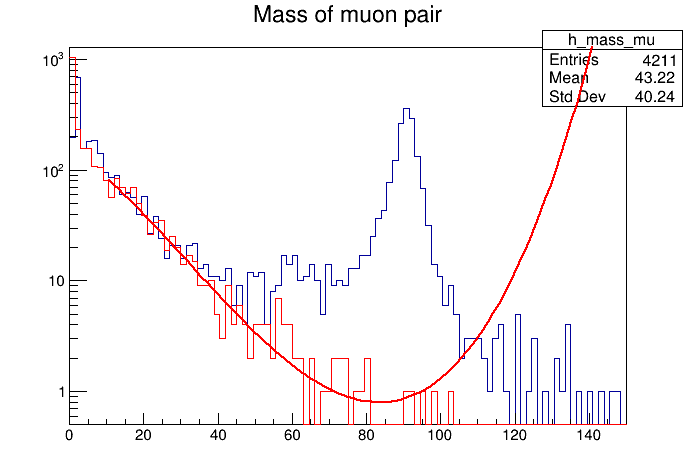

In [17]:
#Forse si può migliorare un po'...
m_min_fit= 10
bkg2 = ROOT.TF1("expo_bkg_2","[0]/[1]*exp(-([2]*x+[3]*x*x+[4]*x*x*x)/[1])",m_min_fit,m_max)
bkg2.SetParameters(1000,20,1,1,0.1)

h_mass_mu_ss.Fit(bkg2,"SR")
c1.Draw()

 FCN=152.249 FROM MIGRAD    STATUS=CONVERGED    1821 CALLS        1822 TOTAL
                     EDM=4.57301e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.22483e+04   5.53179e+02   2.05949e-01   4.44772e-07
   2  p1           1.54681e+01   2.99394e+00   1.43564e-03   9.62449e-04
   3  p2           2.29531e+03   6.92878e+01   7.34236e-03  -3.38575e-07
   4  p3           9.07868e+01   7.61438e-02   2.88454e-05  -3.51178e-03
   5  p4           2.94280e+00   1.00271e-01  -1.06051e-05  -9.73972e-04
   6  p5           3.37862e+00   4.48361e-01   2.49102e-04  -1.80283e-02
   7  p6          -5.42789e-02   6.65980e-03  -4.33421e-06  -1.07638e+00
   8  p7           2.77962e-04   3.39204e-05   2.43422e-08  -6.46821e+01


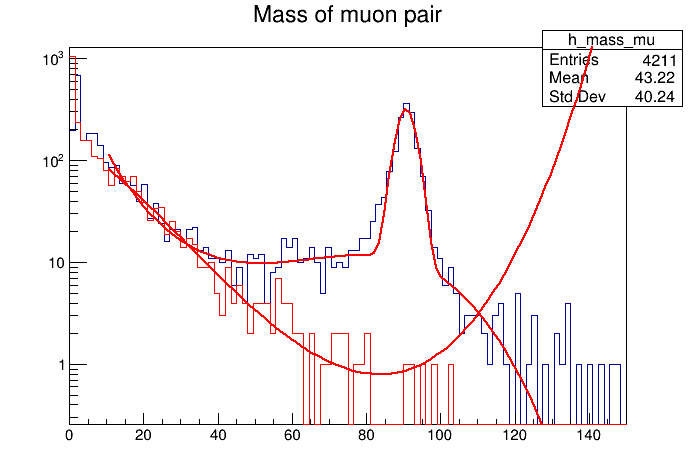

In [18]:
sigbkg = ROOT.TF1("sig_bkg","[0]/[1]*exp(-([5]*x+[6]*x*x+[7]*x*x*x)/[1])+[2]*1/([4]*TMath::Sqrt(2*TMath::Pi()))*exp(-(x-[3])*(x-[3])/(TMath::Sqrt(2)*[4]*[4]))",m_min_fit,m_max)
sigbkg.SetParameters(1000,20,1000,90,10,1,1,0.1)
c1.Draw()
h_mass_mu.Fit(sigbkg,"SR")


# Esercizio #1 

Proviamo a stimare il numero di eventi sotto il picco con il fit in due modi diversi : fit s+b, fit b.

# Esercizio #2 


Confrontiamo la nostra definizione di massa con la definizione 

# Esercizio #3


Definita la nostra selezione (es. massa >40 GeV) proviamo a studiare le altre features della muontrack:

chi2 -> chi2 del fit alla traccia
dz -> parametro di impatto lungo Z
dB -> parametro di impatto nel piano xy
isodeposits -> depositi calorimetrici intorno al muone

In [12]:
mytree.Scan("muontracks_chi2:muontracks_dz:muontracks_dB:muontracks_isoDeposits","","",10)

16

***********************************************************************
*    Row   * Instance * muontrack * muontrack * muontrack * muontrack *
***********************************************************************
*        0 *        0 * 1.0335342 * 0.0252492 * 0.0002856 * 1.0729610 *
*        0 *        1 * 1.0741999 * 0.0242608 * 0.0031903 * 2.9965186 *
*        1 *        0 *           *           *           *           *
*        2 *        0 *           *           *           *           *
*        3 *        0 * 0.7568610 * 0.0140937 * 0.0177467 *         0 *
*        3 *        1 * 0.0214010 * 12.813911 * 0.0310324 *         0 *
*        4 *        0 *           *           *           *           *
*        5 *        0 * 0.6926183 * 5.362e-05 * 2.051e-05 * 0.6069132 *
*        6 *        0 * 1.0029804 * 0.0005141 * 1.299e-05 *         0 *
*        6 *        1 * 0.4243881 * 0.0052267 * 0.0001941 * 1.2594964 *
*        7 *        0 * 1.0884974 * 2.104e-05 * 7.020e-06 *     

# Esercizio #4:

Proviamo su questo campione "mixed" di dati

In [13]:
dataFile= ROOT.TFile("Data.root")
#Nota: io l'ho scaricato in locale - potete fare lo stesso o usare il wget as you prefer :)

In [19]:
datatree= dataFile.trees.events
datatree.GetEntries()

NameError: name 'dataFile' is not defined

In [15]:
h_data_mass_mu_os=ROOT.TH1F("h_data_mu_os","Mass of muon pair, data",1500,m_min,m_max)
h_data_mass_mu_ss=h_data_mass_mu_os.Clone("h_data_mu_ss")

for i in range(datatree.GetEntries()):
#for i in range(100):
    datatree.GetEntry(i)
    muons=get_collection(datatree,"muontracks")
    electrons=get_collection(datatree,"electrons")
    jets=get_collection(datatree,"jets")
   
    for mi in range(len(muons)):
        for mj in range(mi):
            if(are_os(muons[mi],muons[mj])):
                h_data_mass_mu_os.Fill((muons[mi].p4+muons[mj].p4).M())
            else:
                h_data_mass_mu_ss.Fill((muons[mi].p4+muons[mj].p4).M())


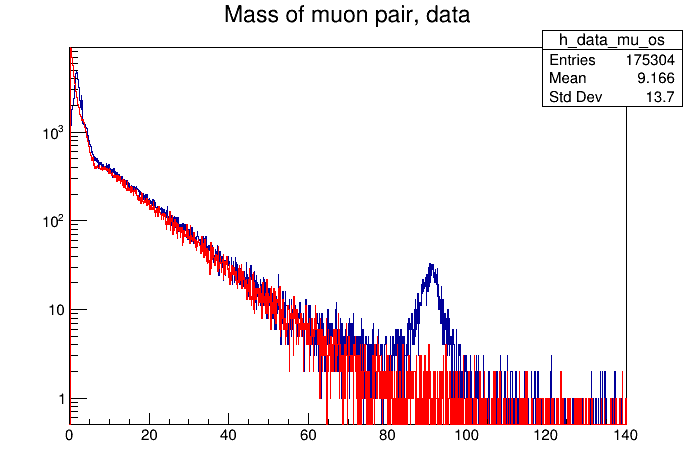

In [16]:
c1.Draw()
h_data_mass_mu_os.Draw()
h_data_mass_mu_ss.SetLineColor(ROOT.kRed)
h_data_mass_mu_ss.Draw("same")
h_data_mass_mu_os.GetXaxis().SetRangeUser(0,140)
#h_data_mass_mu_os.Rebin(2)
#h_data_mass_mu_ss.Rebin(2)
c1.Update()

